<h1>Import Libraries</h1>


In [1]:
import numpy as np
import pandas as pd
pd.options.display.max_columns = 100
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# To display all results in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

<h1>Import Test and Training Set</h1>

In [3]:
# Import csv file and store them as pandas dataframe
test = pd.read_csv("test.csv")
train = pd.read_csv("train.csv")

In [4]:
print('The train set has the shape {}'.format(train.shape))
train.head(5)
train.describe()
train.count() #Is there any NaN cell among 891 entries?

The train set has the shape (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [6]:
print('The test set has the shape {}'.format(test.shape))
test.head(5)
test.describe()
test.count()

The test set has the shape (418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


PassengerId    418
Pclass         418
Name           418
Sex            418
Age            332
SibSp          418
Parch          418
Ticket         418
Fare           417
Cabin           91
Embarked       418
dtype: int64

<h1>Data Visualization</h1>

<h2>Sex</h2>

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Sex,,,,,,,
female,431.028662,0.742038,2.159236,27.915709,0.694268,0.649682,44.479818
male,454.147314,0.188908,2.389948,30.726645,0.429809,0.235702,25.523893


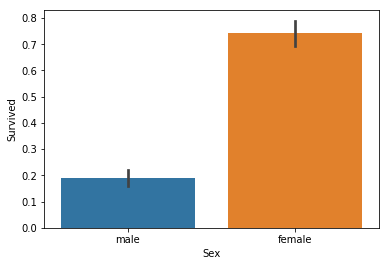

In [10]:
train.groupby(['Sex']).mean()
sns.barplot(x='Sex', y='Survived', data=train)

In [8]:
#Convert the sex label of passengers into boolean values, where male = 1 and non-male =0
train['Sex'] = (train['Sex'] == 'male')*1
test['Sex'] = (test['Sex'] == 'male')*1

In [9]:
train[['Sex','Survived']].corr()

,Sex,Survived
Sex,1.000000,-0.543351
Survived,-0.543351,1.000000


Comment: corr=-0.543351 indicates mild correlation between survival and sex. Male were more likely succumbed than female. 

<h2>Ticket Class (Pclass)</h2>

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare
Pclass,,,,,,,
1,461.597222,0.629630,0.564815,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,0.586957,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,0.706721,25.140620,0.615071,0.393075,13.675550


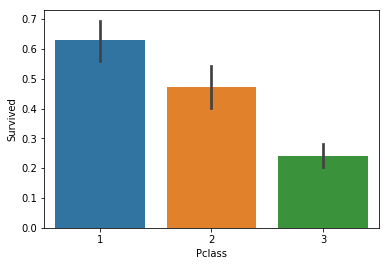

In [10]:
train.groupby(['Pclass']).mean()
sns.barplot(x='Pclass', y='Survived', data=train)

One may also group by ticket class and sex as follows:

PassengerId  Survived        Age     SibSp     Parch        Fare
Pclass Sex                                                                  
1      0     469.212766  0.968085  34.611765  0.553191  0.457447  106.125798
       1     455.729508  0.368852  41.281386  0.311475  0.278689   67.226127
2      0     443.105263  0.921053  28.722973  0.486842  0.605263   21.970121
       1     447.962963  0.157407  30.740707  0.342593  0.222222   19.741782
3      0     399.729167  0.500000  21.750000  0.895833  0.798611   16.118810
       1     455.515850  0.135447  26.507589  0.498559  0.224784   12.661633

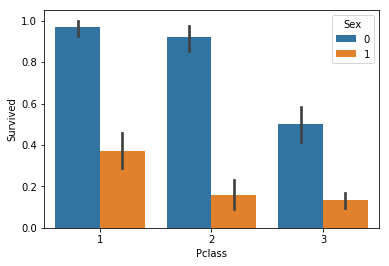

In [11]:
train.groupby(['Pclass','Sex']).mean()
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train)

In [12]:
#Pclass has 3 classes of data: 1, 2, 3
train['Pclass1'] = (train['Pclass'] == 1)*1
train['Pclass2'] = (train['Pclass'] == 2)*1
train['Pclass3'] = (train['Pclass'] == 3)*1

train[['Pclass1','Survived']].corr()
train[['Pclass2','Survived']].corr()
train[['Pclass3','Survived']].corr()

,Pclass1,Survived
Pclass1,1.000000,0.285904
Survived,0.285904,1.000000


,Pclass2,Survived
Pclass2,1.000000,0.093349
Survived,0.093349,1.000000


,Pclass3,Survived
Pclass3,1.000000,-0.322308
Survived,-0.322308,1.000000


<h2>Number of Siblings/Spouses Aboard (SibSp)</h2>

,PassengerId,Survived,Pclass,Sex,Age,Parch,Fare,Pclass1,Pclass2,Pclass3
SibSp,,,,,,,,,,
0,455.370066,0.345395,2.351974,0.713816,31.397558,0.185855,25.692028,0.225329,0.197368,0.577303
1,439.727273,0.535885,2.057416,0.492823,30.089727,0.655502,44.147370,0.339713,0.263158,0.397129
2,412.428571,0.464286,2.357143,0.535714,22.620000,0.642857,51.753718,0.178571,0.285714,0.535714
3,321.562500,0.250000,2.562500,0.312500,13.916667,1.312500,68.908862,0.187500,0.062500,0.750000
4,381.611111,0.166667,3.000000,0.666667,7.055556,1.500000,31.855556,0.000000,0.000000,1.000000
5,336.800000,0.000000,3.000000,0.800000,10.200000,2.000000,46.900000,0.000000,0.000000,1.000000
8,481.714286,0.000000,3.000000,0.571429,NaN,2.000000,69.550000,0.000000,0.000000,1.000000


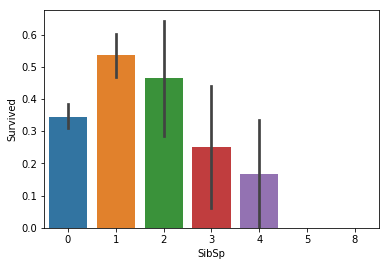

In [13]:
train.groupby(['SibSp']).mean()
sns.barplot(x='SibSp', y='Survived', data=train)

<h2>Number of Parents/Children Aboard (Parch)</h2>

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Fare,Pclass1,Pclass2,Pclass3
Parch,,,,,,,,,,
0,445.255162,0.343658,2.321534,0.713864,32.178503,0.237463,25.586774,0.240413,0.197640,0.561947
1,465.110169,0.550847,2.203390,0.491525,24.422000,1.084746,46.778180,0.262712,0.271186,0.466102
2,416.662500,0.500000,2.275000,0.387500,17.216912,2.062500,64.337604,0.262500,0.200000,0.537500
3,579.200000,0.600000,2.600000,0.200000,33.200000,1.000000,25.951660,0.000000,0.400000,0.600000
4,384.000000,0.000000,2.500000,0.500000,44.500000,0.750000,84.968750,0.250000,0.000000,0.750000
5,435.200000,0.200000,3.000000,0.200000,39.200000,0.600000,32.550000,0.000000,0.000000,1.000000
6,679.000000,0.000000,3.000000,0.000000,43.000000,1.000000,46.900000,0.000000,0.000000,1.000000


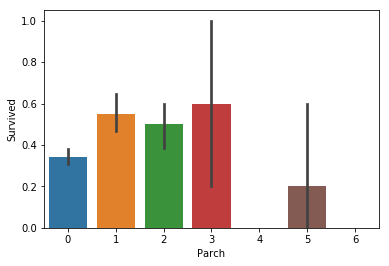

In [14]:
train.groupby(['Parch']).mean()
sns.barplot(x='Parch', y='Survived',data=train)

<h2>Total Family member</h2>

In [15]:
train['TotalFam']=train['SibSp']+train['Parch']

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3
TotalFam,,,,,,,,,,,
0,458.000000,0.303538,2.400372,0.765363,32.220297,0.000000,0.000000,21.242689,0.202980,0.193669,0.603352
1,412.838509,0.552795,1.919255,0.459627,31.391511,0.763975,0.236025,49.894129,0.434783,0.211180,0.354037
2,448.352941,0.578431,2.225490,0.519608,26.035806,0.872549,1.127451,39.692482,0.235294,0.303922,0.460784
3,514.344828,0.724138,2.068966,0.344828,18.274815,1.344828,1.655172,54.864510,0.241379,0.448276,0.310345
4,367.866667,0.200000,2.666667,0.200000,20.818182,2.133333,1.866667,58.094453,0.133333,0.066667,0.800000
5,400.136364,0.136364,2.590909,0.636364,18.409091,2.818182,2.181818,73.722727,0.181818,0.045455,0.772727
6,355.750000,0.333333,3.000000,0.333333,15.166667,3.250000,2.750000,29.366667,0.000000,0.000000,1.000000
7,393.833333,0.000000,3.000000,0.666667,15.666667,4.333333,2.666667,46.900000,0.000000,0.000000,1.000000
10,481.714286,0.000000,3.000000,0.571429,NaN,8.000000,2.000000,69.550000,0.000000,0.000000,1.000000


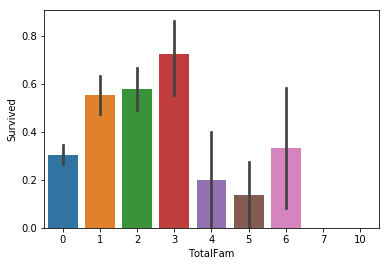

In [16]:
train.groupby(['TotalFam']).mean()
sns.barplot(x='TotalFam', y='Survived', data=train)

<h2>Embarkment</h2>

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Pclass1,Pclass2,Pclass3,TotalFam
Embarked,,,,,,,,,,,,
C,445.357143,0.553571,1.886905,0.565476,30.814769,0.386905,0.363095,59.954144,0.505952,0.101190,0.392857,0.750000
Q,417.896104,0.389610,2.909091,0.532468,28.089286,0.428571,0.168831,13.276030,0.025974,0.038961,0.935065,0.597403
S,449.527950,0.336957,2.350932,0.684783,29.445397,0.571429,0.413043,27.079812,0.197205,0.254658,0.548137,0.984472


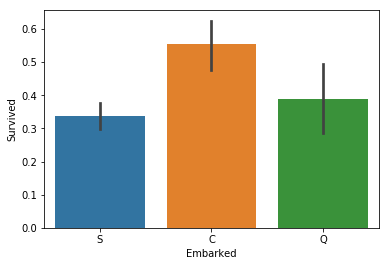

In [17]:
train.groupby(['Embarked']).mean()
sns.barplot(x='Embarked', y='Survived', data=train)

In [18]:
#Embarkement has 3 classes of data: S, C, Q.
train['EmbarkedC'] = (train['Embarked'] == 'C')*1
train['EmbarkedS'] = (train['Embarked'] == 'S')*1
train['EmbarkedQ'] = (train['Embarked'] == 'Q')*1

In [19]:
train[['EmbarkedC','Survived']].corr()
train[['EmbarkedS','Survived']].corr()
train[['EmbarkedQ','Survived']].corr()

,EmbarkedC,Survived
EmbarkedC,1.00000,0.16824
Survived,0.16824,1.00000


,EmbarkedS,Survived
EmbarkedS,1.00000,-0.15566
Survived,-0.15566,1.00000


,EmbarkedQ,Survived
EmbarkedQ,1.00000,0.00365
Survived,0.00365,1.00000


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass1,Pclass2,Pclass3,TotalFam,EmbarkedC,EmbarkedS,EmbarkedQ
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,1,0,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,0,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,1,0
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,0,1,0
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,0,0,1,0,0,0,1
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,E46,S,1,0,0,0,0,1,0
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,NaN,S,0,0,1,4,0,1,0
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,NaN,S,0,0,1,2,0,1,0
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.0,1,0,237736,30.0708,NaN,C,0,1,0,1,1,0,0


<h2>Age</h2>

~200 entries of age was missing. Need linear regression to interpolate it.

ageregression.ipynb located in this directory deals with age interpolation.

In [21]:
#Sturges' Rule for number of bins
k_bin = 1 + np.log2(train['Age'].nunique())
k_bin

7.459431618637297

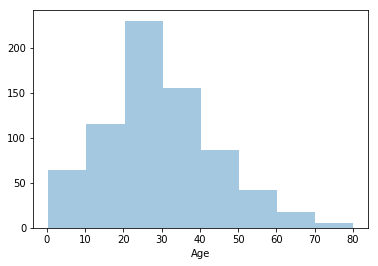

In [22]:
sns.distplot(train['Age'].dropna(), kde = False, bins=int(np.ceil(k_bin)))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass1,Pclass2,Pclass3,TotalFam,EmbarkedC,EmbarkedS,EmbarkedQ
5,6,0,3,"Moran, Mr. James",1,NaN,0,0,330877,8.4583,NaN,Q,0,0,1,0,0,0,1
17,18,1,2,"Williams, Mr. Charles Eugene",1,NaN,0,0,244373,13.0000,NaN,S,0,1,0,0,0,1,0
19,20,1,3,"Masselmani, Mrs. Fatima",0,NaN,0,0,2649,7.2250,NaN,C,0,0,1,0,1,0,0
26,27,0,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,C,0,0,1,0,1,0,0
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",0,NaN,0,0,330959,7.8792,NaN,Q,0,0,1,0,0,0,1
29,30,0,3,"Todoroff, Mr. Lalio",1,NaN,0,0,349216,7.8958,NaN,S,0,0,1,0,0,1,0
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,NaN,1,0,PC 17569,146.5208,B78,C,1,0,0,1,1,0,0
32,33,1,3,"Glynn, Miss. Mary Agatha",0,NaN,0,0,335677,7.7500,NaN,Q,0,0,1,0,0,0,1
36,37,1,3,"Mamee, Mr. Hanna",1,NaN,0,0,2677,7.2292,NaN,C,0,0,1,0,1,0,0
42,43,0,3,"Kraeff, Mr. Theodor",1,NaN,0,0,349253,7.8958,NaN,C,0,0,1,0,1,0,0


In [1]:
train.corr()['Age']

NameError: name 'train' is not defined

In [44]:
LinAge = pd.concat([train['Pclass1'],train['Pclass3'], train['SibSp'],train['Parch'], train['Age']], axis = 1)

In [47]:
LinAge.dropna(inplace=True)

In [144]:
LinAgeY = LinAge[['Age']]

In [128]:
LinAgeX = LinAge.drop('Age', axis =1)

In [131]:
LinAgeX.as_matrix()

array([[0, 1, 1, 0],
       [1, 0, 1, 0],
       [0, 1, 0, 0],
       ...,
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 1, 0, 0]])

In [145]:
LinAgeX.shape
LinAgeY.shape
train['Age'].shape

(714, 4)

(714, 1)

(891,)

In [118]:
from sklearn.linear_model import LinearRegression

In [120]:
AgeRegress = LinearRegression()

In [133]:
AgeRegress.fit(X=LinAgeX.as_matrix(), y=LinAgeY)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [146]:
#AgeRegress.predict(Xtrain)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

<h2>Fare</h2>

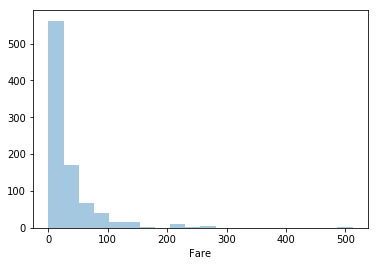

In [79]:
sns.distplot(train['Fare'], kde = False, bins = 20)

In [80]:
train[['Fare','Survived']].corr()

,Fare,Survived
Fare,1.000000,0.257307
Survived,0.257307,1.000000


<h1>Pre-machine Learning Processing</h1>

Use Age, Sex and PClass to predict

In [83]:
#import scikit-learn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cross_validation import train_test_split

In [132]:
#Normalize all columns and rescale them around 0
Age_normal = (train['Age']-allage.mean())/np.sqrt(allage.var())
#Age_normal

In [133]:
# Concatenate outcome with predictors
X = pd.concat([train['Pclass'],Age_normal,train['Sex']],axis=1)
X.head(5)

,Pclass,Age,Sex
0,3,-0.546789,1
1,1,0.563282,0
2,3,-0.269271,0
3,1,0.355144,0
4,3,0.355144,1


In [134]:
#Split a portion of train set into dev set randomly 
#such that size of train:size of dev ~ 7:3
X_train, X_dev, Y_train, Y_dev = train_test_split(X, train['Survived'], test_size=0.3)

In [135]:
#Display some data
X_dev.count()

Pclass    268
Age       268
Sex       268
dtype: int64

<h1>KNN</h1>

In [136]:
neigh = KNeighborsClassifier() #neigh is so-called coz KNN groups classification by the closest neighbours

In [137]:
neigh.fit(X_train,Y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [138]:
Y_hat = neigh.predict(X_dev)

In [139]:
Y_hat #So now I have some survival prediction?

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0])

In [140]:
#Accuracy of prediction
sum(Y_dev==Y_hat)/Y_dev.count()

0.7985074626865671

<h1>Export</h1>

In [142]:
#Also normalize Age column for X_test
Age_normal = (test['Age']-allage.mean())/np.sqrt(allage.var())

In [145]:
X_test = pd.concat([test['Pclass'],Age_normal, test['Sex']], axis=1)

In [147]:
X_test.head(5)

,Pclass,Age,Sex
0,3,0.320454,1
1,3,1.187697,0
2,2,2.228388,1
3,3,-0.199892,1
4,3,-0.546789,0


In [148]:
#Now run neigh.predict() for X_test
Y_hat = neigh.predict(X_test)

In [149]:
Survived = pd.Series(Y_hat, name = 'Survived')

In [150]:
Survived

0      0
1      0
2      0
3      1
4      0
5      0
6      0
7      0
8      0
9      0
10     0
11     0
12     1
13     0
14     1
15     1
16     0
17     0
18     1
19     0
20     0
21     0
22     1
23     0
24     1
25     0
26     1
27     0
28     0
29     0
      ..
388    0
389    0
390    0
391    1
392    0
393    0
394    0
395    1
396    0
397    1
398    0
399    0
400    1
401    0
402    1
403    0
404    1
405    0
406    0
407    0
408    1
409    0
410    1
411    1
412    1
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [151]:
test['PassengerId']

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [152]:
output = test['PassengerId'].to_frame().join(Survived.to_frame())

In [153]:
output;

In [154]:
output.to_csv('solution.csv', index=False)

April 2:
'Your Best Entry 
You advanced 132 places on the leaderboard!
Your submission scored 0.72248, which is an improvement of your previous score of 0.69856. Great job!'